<a href="https://colab.research.google.com/github/rithishdev/ML_Exp01/blob/main/ML_Exp01_Sce01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

24BAD099 - Rithish A

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

print("24BAD099 - Rithish A")
print("Libraries imported successfully.")

24BAD099 - Rithish A
Libraries imported successfully.


In [33]:
df = pd.read_csv('/scenario1.csv', encoding='latin1')
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [34]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nLast 5 rows of the DataFrame:")
print(df.tail())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics of the DataFrame:")
print(df.describe())

First 5 rows of the DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  

Last 5 rows of the DataFrame:
       InvoiceNo StockCode                        Description  Quantity  \
363727    568576     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      48.0   
3

In [35]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
InvoiceNo          0
StockCode          0
Description     1255
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     96722
Country            1
dtype: int64


In [36]:
df_cleaned = df.dropna(subset=['Quantity', 'UnitPrice'])

df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

print("DataFrame cleaned by removing rows with missing 'Quantity' or 'UnitPrice', and filtering for positive 'Quantity' and 'UnitPrice'.")
print(f"Original DataFrame size: {len(df)}")
print(f"Cleaned DataFrame size: {len(df_cleaned)}")


DataFrame cleaned by removing rows with missing 'Quantity' or 'UnitPrice', and filtering for positive 'Quantity' and 'UnitPrice'.
Original DataFrame size: 363732
Cleaned DataFrame size: 355251


In [37]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

print("Added 'TotalPrice' column to the cleaned DataFrame.")
print(df_cleaned.head())

Added 'TotalPrice' column to the cleaned DataFrame.
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  


In [38]:
sales_per_product = df_cleaned.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)

print("Total sales per product (Top 10):")
print(sales_per_product.head(10))

Total sales per product (Top 10):
Description
REGENCY CAKESTAND 3 TIER              140424.33
DOTCOM POSTAGE                        129825.47
PARTY BUNTING                          89452.25
WHITE HANGING HEART T-LIGHT HOLDER     84011.11
MEDIUM CERAMIC TOP STORAGE JAR         80284.32
JUMBO BAG RED RETROSPOT                68918.50
POSTAGE                                56002.29
Manual                                 52795.99
ASSORTED COLOUR BIRD ORNAMENT          43061.09
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalPrice, dtype: float64


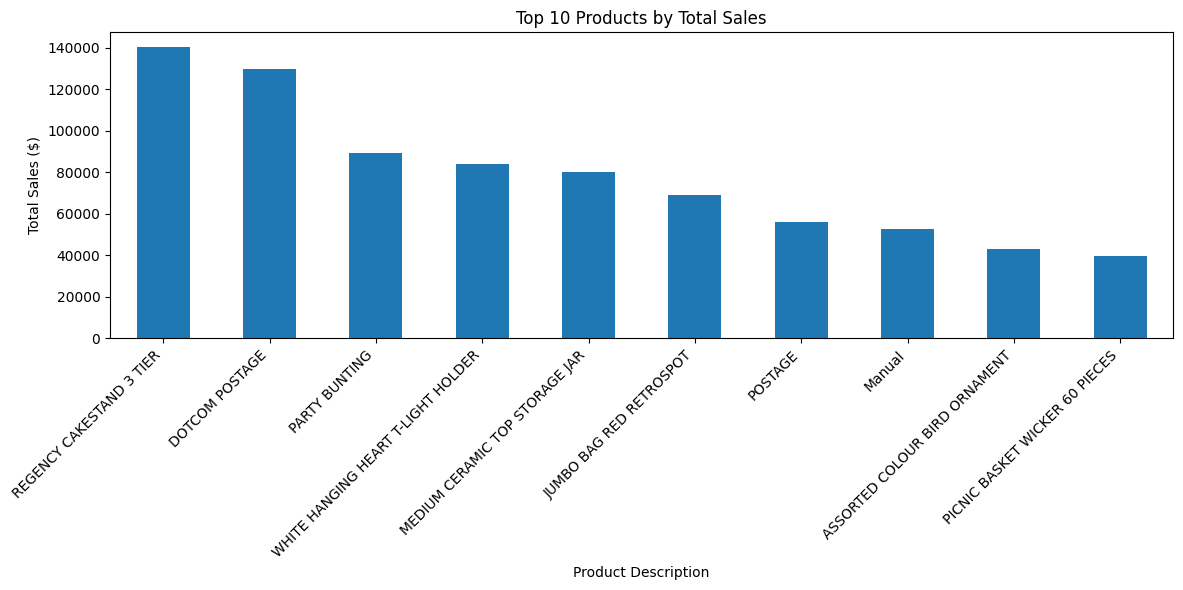

Bar plot showing top 10 products by total sales generated successfully.


In [39]:
plt.figure(figsize=(12, 6))
sales_per_product.head(10).plot(kind='bar')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product Description')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Bar plot showing top 10 products by total sales generated successfully.")

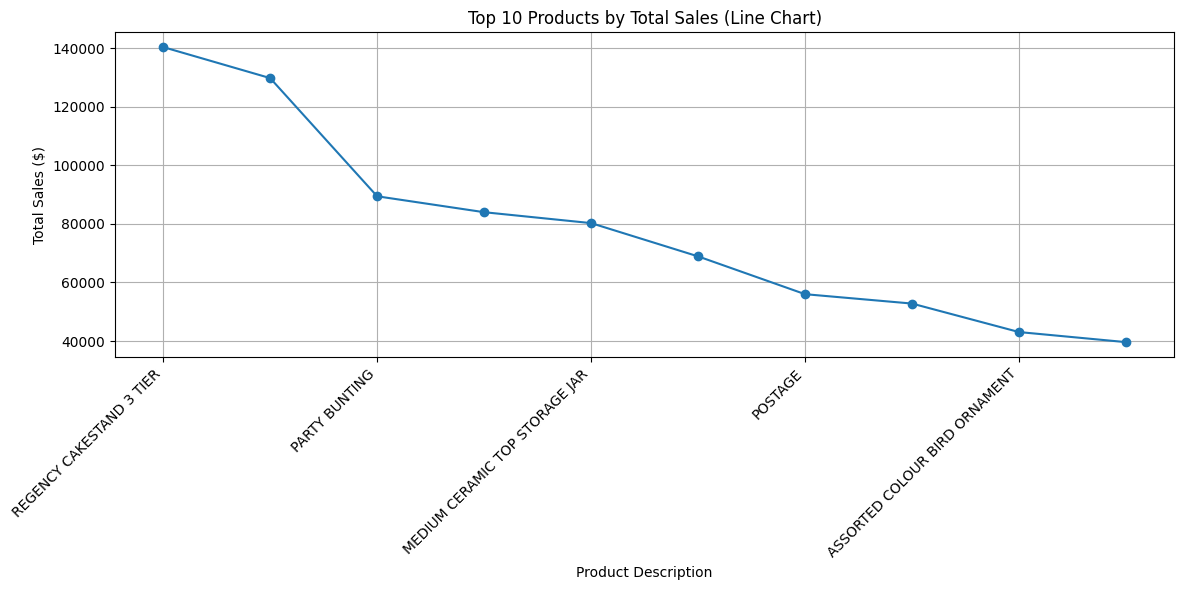

Line chart showing top 10 products by total sales generated successfully.


In [40]:
plt.figure(figsize=(12, 6))
sales_per_product.head(10).plot(kind='line', marker='o')
plt.title('Top 10 Products by Total Sales (Line Chart)')
plt.xlabel('Product Description')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Line chart showing top 10 products by total sales generated successfully.")